Once deleted, variables cannot be recovered. Proceed (y/[n])? y


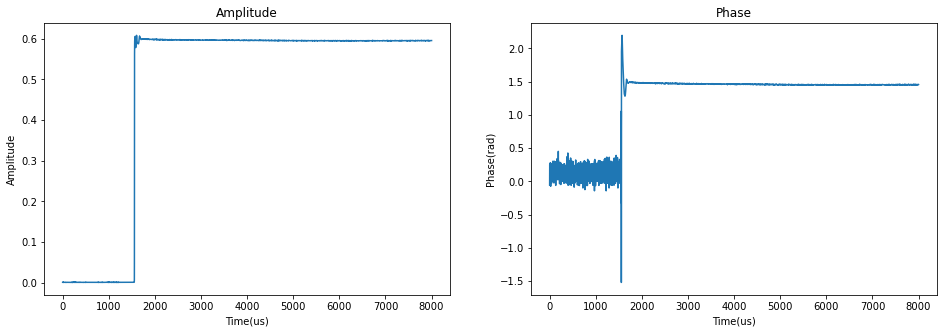

                      timestamp  amplitude  phase/rad
0     9/9/2021  15:38:50.155107   0.001131  -0.054002
1     9/9/2021  15:38:50.155108   0.001222   0.049958
2     9/9/2021  15:38:50.155108   0.001103   0.251690
3     9/9/2021  15:38:50.155109   0.001099   0.027771
4     9/9/2021  15:38:50.155109   0.001030   0.209023
...                         ...        ...        ...
7996  9/9/2021  15:38:50.159105   0.595425   1.455628
7997  9/9/2021  15:38:50.159106   0.595443   1.455373
7998  9/9/2021  15:38:50.159106   0.595420   1.455266
7999  9/9/2021  15:38:50.159107   0.595454   1.456098
8000                        NaN        NaN        NaN

[8001 rows x 3 columns]


TypeError: can't multiply sequence by non-int of type 'float'

In [68]:
%reset

import pandas as pd
import csv
import matplotlib.pyplot as plt
from numpy import pi, sin, cos, sqrt, arctan
from scipy.integrate import simps
import numpy as np

df=pd.read_csv(r'C:\Users\c_che\OneDrive\Desktop\Year 4 Sem 1\FYP\single_shot_data_2\0\0db_210909_153850_aom1.csv', skiprows=[0])

#Read csv file and translate timestamp into time(us)
def prep_f(fn,threshold):
    """input: full path of filename & threshold value, outputs: dataframe"""
    df = pd.read_csv(fn,header=None,names=['timestamp','amplitude','phase/rad'])
    frame_size, T = list(df.iloc[0])[:2]
    frame_size = int(frame_size.split(' ')[-1])
    T = float(T.split(' ')[-1])
    #immediately there is a problem: timestamp only has 0.1ms resolution - breaks when samples are 50us apart
    df = df.iloc[3:]
    df['t/us'] = np.linspace(0,T,frame_size)
    df = df.set_index('t/us').iloc[:-1]
    df = df.drop('timestamp',axis='columns') #redundant col
    df = df.applymap(lambda x: float(x)) #convert str to float
    #only consider values above certain threshold
    df = df[df['amplitude']>threshold]
    return df

#Plot graphs
fig, [ax0,ax1] = plt.subplots(1,2,figsize=(16,5))
ax0.plot(df['amplitude'])
ax1.plot(df['phase/rad'])
#Label title and axes
ax0.title.set_text('Amplitude')
ax1.title.set_text('Phase')
ax0.set(xlabel="Time(us)",ylabel="Amplitude")
ax1.set(xlabel="Time(us)",ylabel="Phase(rad)")

plt.show()

print(df)

#Define Rabi sensitivity function
T = 0.08
d = 2
df = np.array(df)
t = np.linspace(0, 8000, 1)

o1 = (pi*sqrt(1+(2*T*d)**2))*(t/T)
o2 = (pi*sqrt(1+(2*T*d)**2))*((T-t)/T)
dg = ((2*pi*d)/(1+(2*T*d)**2)) * ((1 - cos(o2))*cos(o1) - (1 - cos(o1)*cos(o2)))

#Multiply arrays and sum to get total phase shift
I = df*dg*t
print(I)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


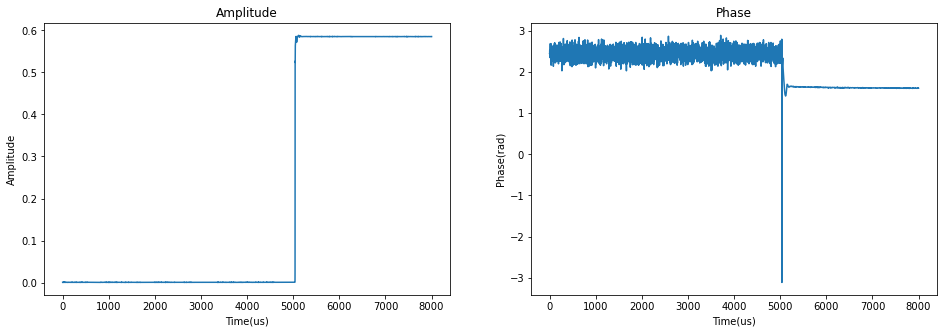

In [23]:
%reset

import pandas as pd
import csv
import matplotlib.pyplot as plt

df=pd.read_csv(r'C:\Users\c_che\OneDrive\Desktop\Year 4 Sem 1\FYP\single_shot_data_2\1db_210909_154346_aom1.csv', skiprows=[0])

#Read csv file and get rid of redundant columns
def prep_f(fn,threshold):
    """input: full path of filename & threshold value, outputs: dataframe"""
    df = pd.read_csv(fn,header=None,names=['timestamp','amplitude','phase/rad'])
    frame_size, T = list(df.iloc[0])[:2]
    frame_size = int(frame_size.split(' ')[-1])
    T = float(T.split(' ')[-1])
    #immediately there is a problem: timestamp only has 0.1ms resolution - breaks when samples are 50us apart
    df = df.iloc[3:]
    df['t/us'] = np.linspace(0,T,frame_size)
    df = df.set_index('t/us').iloc[:-1]
    df = df.drop('timestamp',axis='columns') #redundant col
    df = df.applymap(lambda x: float(x)) #convert str to float
    #only consider values above certain threshold
    df = df[df['amplitude']>threshold]
    return df

#Plot graphs
fig, [ax0,ax1] = plt.subplots(1,2,figsize=(16,5))
ax0.plot(df['amplitude'])
ax1.plot(df['phase/rad'])
#Label title and axes
ax0.title.set_text('Amplitude')
ax1.title.set_text('Phase')
ax0.set(xlabel="Time(us)",ylabel="Amplitude")
ax1.set(xlabel="Time(us)",ylabel="Phase(rad)")

plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


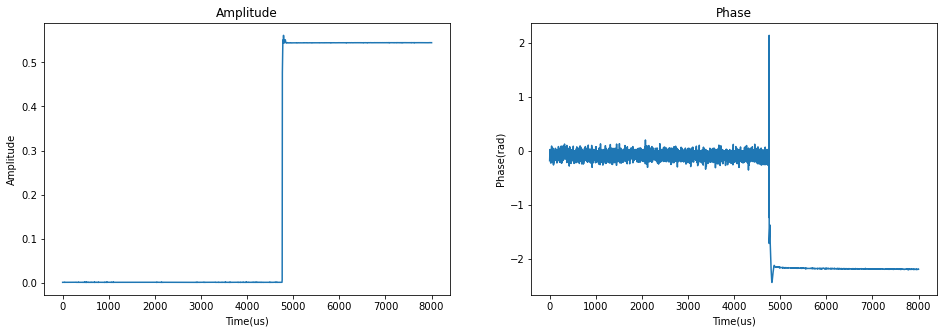

In [24]:
%reset

import pandas as pd
import csv
import matplotlib.pyplot as plt

df=pd.read_csv(r'C:\Users\c_che\OneDrive\Desktop\Year 4 Sem 1\FYP\single_shot_data_2\2db_210909_154936_aom1.csv', skiprows=[0])

#Read csv file and get rid of redundant columns
def prep_f(fn,threshold):
    """input: full path of filename & threshold value, outputs: dataframe"""
    df = pd.read_csv(fn,header=None,names=['timestamp','amplitude','phase/rad'])
    frame_size, T = list(df.iloc[0])[:2]
    frame_size = int(frame_size.split(' ')[-1])
    T = float(T.split(' ')[-1])
    #immediately there is a problem: timestamp only has 0.1ms resolution - breaks when samples are 50us apart
    df = df.iloc[3:]
    df['t/us'] = np.linspace(0,T,frame_size)
    df = df.set_index('t/us').iloc[:-1]
    df = df.drop('timestamp',axis='columns') #redundant col
    df = df.applymap(lambda x: float(x)) #convert str to float
    #only consider values above certain threshold
    df = df[df['amplitude']>threshold]
    return df

#Plot graphs
fig, [ax0,ax1] = plt.subplots(1,2,figsize=(16,5))
ax0.plot(df['amplitude'])
ax1.plot(df['phase/rad'])
#Label title and axes
ax0.title.set_text('Amplitude')
ax1.title.set_text('Phase')
ax0.set(xlabel="Time(us)",ylabel="Amplitude")
ax1.set(xlabel="Time(us)",ylabel="Phase(rad)")

plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


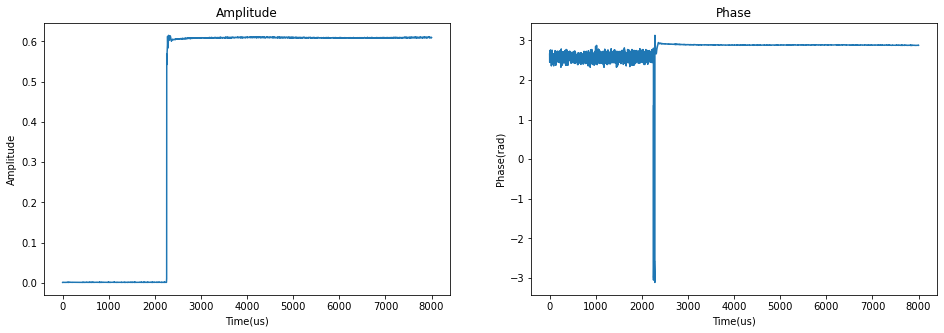

In [25]:
%reset

import pandas as pd
import csv
import matplotlib.pyplot as plt

df=pd.read_csv(r'C:\Users\c_che\OneDrive\Desktop\Year 4 Sem 1\FYP\single_shot_data_2\3db_210909_155403_aom1.csv', skiprows=[0])

#Read csv file and get rid of redundant columns
def prep_f(fn,threshold):
    """input: full path of filename & threshold value, outputs: dataframe"""
    df = pd.read_csv(fn,header=None,names=['timestamp','amplitude','phase/rad'])
    frame_size, T = list(df.iloc[0])[:2]
    frame_size = int(frame_size.split(' ')[-1])
    T = float(T.split(' ')[-1])
    #immediately there is a problem: timestamp only has 0.1ms resolution - breaks when samples are 50us apart
    df = df.iloc[3:]
    df['t/us'] = np.linspace(0,T,frame_size)
    df = df.set_index('t/us').iloc[:-1]
    df = df.drop('timestamp',axis='columns') #redundant col
    df = df.applymap(lambda x: float(x)) #convert str to float
    #only consider values above certain threshold
    df = df[df['amplitude']>threshold]
    return df

#Plot graphs
fig, [ax0,ax1] = plt.subplots(1,2,figsize=(16,5))
ax0.plot(df['amplitude'])
ax1.plot(df['phase/rad'])
#Label title and axes
ax0.title.set_text('Amplitude')
ax1.title.set_text('Phase')
ax0.set(xlabel="Time(us)",ylabel="Amplitude")
ax1.set(xlabel="Time(us)",ylabel="Phase(rad)")

plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


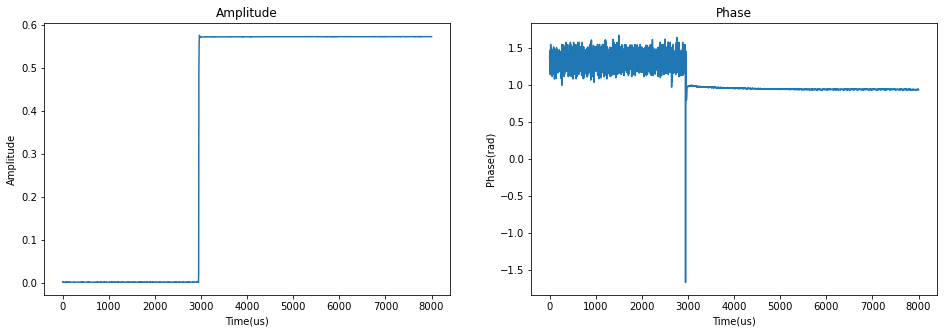

In [26]:
%reset

import pandas as pd
import csv
import matplotlib.pyplot as plt

df=pd.read_csv(r'C:\Users\c_che\OneDrive\Desktop\Year 4 Sem 1\FYP\single_shot_data_2\4db_210909_160122_aom1.csv', skiprows=[0])

#Read csv file and get rid of redundant columns
def prep_f(fn,threshold):
    """input: full path of filename & threshold value, outputs: dataframe"""
    df = pd.read_csv(fn,header=None,names=['timestamp','amplitude','phase/rad'])
    frame_size, T = list(df.iloc[0])[:2]
    frame_size = int(frame_size.split(' ')[-1])
    T = float(T.split(' ')[-1])
    #immediately there is a problem: timestamp only has 0.1ms resolution - breaks when samples are 50us apart
    df = df.iloc[3:]
    df['t/us'] = np.linspace(0,T,frame_size)
    df = df.set_index('t/us').iloc[:-1]
    df = df.drop('timestamp',axis='columns') #redundant col
    df = df.applymap(lambda x: float(x)) #convert str to float
    #only consider values above certain threshold
    df = df[df['amplitude']>threshold]
    return df

#Plot graphs
fig, [ax0,ax1] = plt.subplots(1,2,figsize=(16,5))
ax0.plot(df['amplitude'])
ax1.plot(df['phase/rad'])
#Label title and axes
ax0.title.set_text('Amplitude')
ax1.title.set_text('Phase')
ax0.set(xlabel="Time(us)",ylabel="Amplitude")
ax1.set(xlabel="Time(us)",ylabel="Phase(rad)")

plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


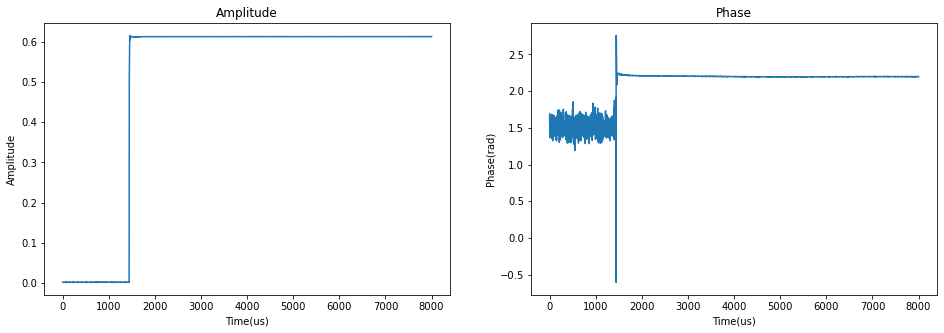

In [27]:
%reset

import pandas as pd
import csv
import matplotlib.pyplot as plt

df=pd.read_csv(r'C:\Users\c_che\OneDrive\Desktop\Year 4 Sem 1\FYP\single_shot_data_2\5db_210909_160451_aom1.csv', skiprows=[0])

#Read csv file and get rid of redundant columns
def prep_f(fn,threshold):
    """input: full path of filename & threshold value, outputs: dataframe"""
    df = pd.read_csv(fn,header=None,names=['timestamp','amplitude','phase/rad'])
    frame_size, T = list(df.iloc[0])[:2]
    frame_size = int(frame_size.split(' ')[-1])
    T = float(T.split(' ')[-1])
    #immediately there is a problem: timestamp only has 0.1ms resolution - breaks when samples are 50us apart
    df = df.iloc[3:]
    df['t/us'] = np.linspace(0,T,frame_size)
    df = df.set_index('t/us').iloc[:-1]
    df = df.drop('timestamp',axis='columns') #redundant col
    df = df.applymap(lambda x: float(x)) #convert str to float
    #only consider values above certain threshold
    df = df[df['amplitude']>threshold]
    return df

#Plot graphs
fig, [ax0,ax1] = plt.subplots(1,2,figsize=(16,5))
ax0.plot(df['amplitude'])
ax1.plot(df['phase/rad'])
#Label title and axes
ax0.title.set_text('Amplitude')
ax1.title.set_text('Phase')
ax0.set(xlabel="Time(us)",ylabel="Amplitude")
ax1.set(xlabel="Time(us)",ylabel="Phase(rad)")

plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


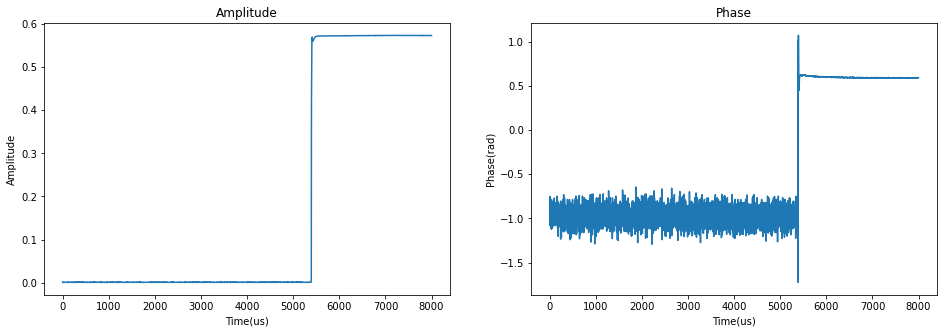

In [28]:
%reset

import pandas as pd
import csv
import matplotlib.pyplot as plt

df=pd.read_csv(r'C:\Users\c_che\OneDrive\Desktop\Year 4 Sem 1\FYP\single_shot_data_2\6db_210909_160825_aom1.csv', skiprows=[0])

#Read csv file and get rid of redundant columns
def prep_f(fn,threshold):
    """input: full path of filename & threshold value, outputs: dataframe"""
    df = pd.read_csv(fn,header=None,names=['timestamp','amplitude','phase/rad'])
    frame_size, T = list(df.iloc[0])[:2]
    frame_size = int(frame_size.split(' ')[-1])
    T = float(T.split(' ')[-1])
    #immediately there is a problem: timestamp only has 0.1ms resolution - breaks when samples are 50us apart
    df = df.iloc[3:]
    df['t/us'] = np.linspace(0,T,frame_size)
    df = df.set_index('t/us').iloc[:-1]
    df = df.drop('timestamp',axis='columns') #redundant col
    df = df.applymap(lambda x: float(x)) #convert str to float
    #only consider values above certain threshold
    df = df[df['amplitude']>threshold]
    return df

#Plot graphs
fig, [ax0,ax1] = plt.subplots(1,2,figsize=(16,5))
ax0.plot(df['amplitude'])
ax1.plot(df['phase/rad'])
#Label title and axes
ax0.title.set_text('Amplitude')
ax1.title.set_text('Phase')
ax0.set(xlabel="Time(us)",ylabel="Amplitude")
ax1.set(xlabel="Time(us)",ylabel="Phase(rad)")

plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


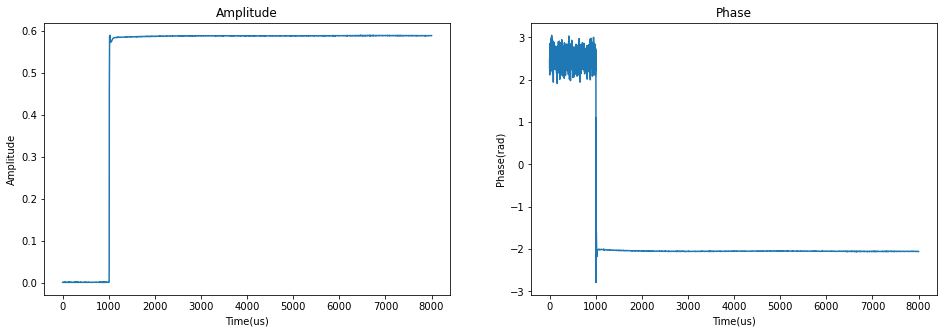

In [29]:
%reset

import pandas as pd
import csv
import matplotlib.pyplot as plt

df=pd.read_csv(r'C:\Users\c_che\OneDrive\Desktop\Year 4 Sem 1\FYP\single_shot_data_2\7db_210909_161213_aom1.csv', skiprows=[0])

#Read csv file and get rid of redundant columns
def prep_f(fn,threshold):
    """input: full path of filename & threshold value, outputs: dataframe"""
    df = pd.read_csv(fn,header=None,names=['timestamp','amplitude','phase/rad'])
    frame_size, T = list(df.iloc[0])[:2]
    frame_size = int(frame_size.split(' ')[-1])
    T = float(T.split(' ')[-1])
    #immediately there is a problem: timestamp only has 0.1ms resolution - breaks when samples are 50us apart
    df = df.iloc[3:]
    df['t/us'] = np.linspace(0,T,frame_size)
    df = df.set_index('t/us').iloc[:-1]
    df = df.drop('timestamp',axis='columns') #redundant col
    df = df.applymap(lambda x: float(x)) #convert str to float
    #only consider values above certain threshold
    df = df[df['amplitude']>threshold]
    return df

#Plot graphs
fig, [ax0,ax1] = plt.subplots(1,2,figsize=(16,5))
ax0.plot(df['amplitude'])
ax1.plot(df['phase/rad'])
#Label title and axes
ax0.title.set_text('Amplitude')
ax1.title.set_text('Phase')
ax0.set(xlabel="Time(us)",ylabel="Amplitude")
ax1.set(xlabel="Time(us)",ylabel="Phase(rad)")

plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


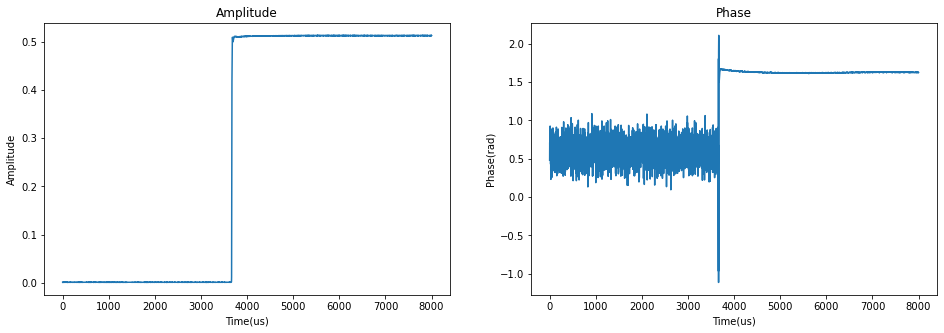

In [30]:
%reset

import pandas as pd
import csv
import matplotlib.pyplot as plt

df=pd.read_csv(r'C:\Users\c_che\OneDrive\Desktop\Year 4 Sem 1\FYP\single_shot_data_2\8db_210909_161430_aom1.csv', skiprows=[0])

#Read csv file and get rid of redundant columns
def prep_f(fn,threshold):
    """input: full path of filename & threshold value, outputs: dataframe"""
    df = pd.read_csv(fn,header=None,names=['timestamp','amplitude','phase/rad'])
    frame_size, T = list(df.iloc[0])[:2]
    frame_size = int(frame_size.split(' ')[-1])
    T = float(T.split(' ')[-1])
    #immediately there is a problem: timestamp only has 0.1ms resolution - breaks when samples are 50us apart
    df = df.iloc[3:]
    df['t/us'] = np.linspace(0,T,frame_size)
    df = df.set_index('t/us').iloc[:-1]
    df = df.drop('timestamp',axis='columns') #redundant col
    df = df.applymap(lambda x: float(x)) #convert str to float
    #only consider values above certain threshold
    df = df[df['amplitude']>threshold]
    return df

#Plot graphs
fig, [ax0,ax1] = plt.subplots(1,2,figsize=(16,5))
ax0.plot(df['amplitude'])
ax1.plot(df['phase/rad'])
#Label title and axes
ax0.title.set_text('Amplitude')
ax1.title.set_text('Phase')
ax0.set(xlabel="Time(us)",ylabel="Amplitude")
ax1.set(xlabel="Time(us)",ylabel="Phase(rad)")

plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


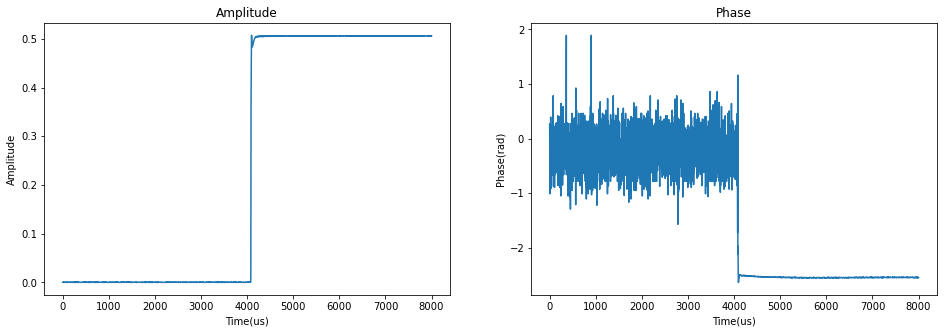

In [31]:
%reset

import pandas as pd
import csv
import matplotlib.pyplot as plt

df=pd.read_csv(r'C:\Users\c_che\OneDrive\Desktop\Year 4 Sem 1\FYP\single_shot_data_2\9db_210909_161627_aom1.csv', skiprows=[0])

#Read csv file and get rid of redundant columns
def prep_f(fn,threshold):
    """input: full path of filename & threshold value, outputs: dataframe"""
    df = pd.read_csv(fn,header=None,names=['timestamp','amplitude','phase/rad'])
    frame_size, T = list(df.iloc[0])[:2]
    frame_size = int(frame_size.split(' ')[-1])
    T = float(T.split(' ')[-1])
    #immediately there is a problem: timestamp only has 0.1ms resolution - breaks when samples are 50us apart
    df = df.iloc[3:]
    df['t/us'] = np.linspace(0,T,frame_size)
    df = df.set_index('t/us').iloc[:-1]
    df = df.drop('timestamp',axis='columns') #redundant col
    df = df.applymap(lambda x: float(x)) #convert str to float
    #only consider values above certain threshold
    df = df[df['amplitude']>threshold]
    return df

#Plot graphs
fig, [ax0,ax1] = plt.subplots(1,2,figsize=(16,5))
ax0.plot(df['amplitude'])
ax1.plot(df['phase/rad'])
#Label title and axes
ax0.title.set_text('Amplitude')
ax1.title.set_text('Phase')
ax0.set(xlabel="Time(us)",ylabel="Amplitude")
ax1.set(xlabel="Time(us)",ylabel="Phase(rad)")

plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


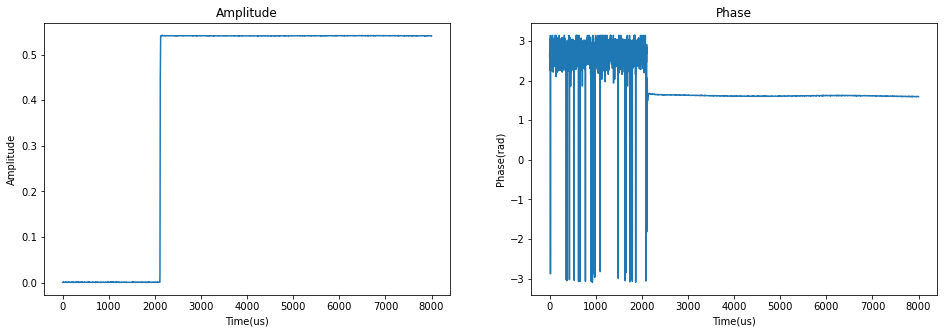

In [32]:
%reset

import pandas as pd
import csv
import matplotlib.pyplot as plt

df=pd.read_csv(r'C:\Users\c_che\OneDrive\Desktop\Year 4 Sem 1\FYP\single_shot_data_2\10db_210909_161816_aom1.csv', skiprows=[0])

#Read csv file and get rid of redundant columns
def prep_f(fn,threshold):
    """input: full path of filename & threshold value, outputs: dataframe"""
    df = pd.read_csv(fn,header=None,names=['timestamp','amplitude','phase/rad'])
    frame_size, T = list(df.iloc[0])[:2]
    frame_size = int(frame_size.split(' ')[-1])
    T = float(T.split(' ')[-1])
    #immediately there is a problem: timestamp only has 0.1ms resolution - breaks when samples are 50us apart
    df = df.iloc[3:]
    df['t/us'] = np.linspace(0,T,frame_size)
    df = df.set_index('t/us').iloc[:-1]
    df = df.drop('timestamp',axis='columns') #redundant col
    df = df.applymap(lambda x: float(x)) #convert str to float
    #only consider values above certain threshold
    df = df[df['amplitude']>threshold]
    return df

#Plot graphs
fig, [ax0,ax1] = plt.subplots(1,2,figsize=(16,5))
ax0.plot(df['amplitude'])
ax1.plot(df['phase/rad'])
#Label title and axes
ax0.title.set_text('Amplitude')
ax1.title.set_text('Phase')
ax0.set(xlabel="Time(us)",ylabel="Amplitude")
ax1.set(xlabel="Time(us)",ylabel="Phase(rad)")

plt.show()